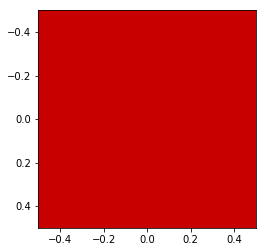

Do you see the color red?
Type yes or no
yes


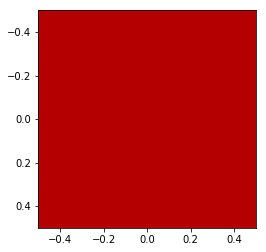

Do you see the color red?
Type yes or no
no


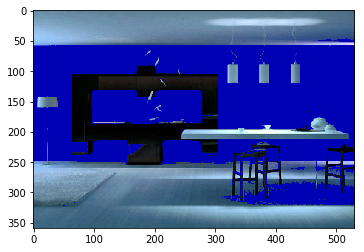

Do you see the color red in this picture?
Type yes or no


KeyboardInterrupt: 

In [36]:
### import ipywidgets as widgets
from IPython.display import display
from IPython.html.widgets import interact
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import nbformat as nbf
from nbconvert.preprocessors import ExecutePreprocessor
import numpy as np
import cv2

def calculateColor():
    my_list = [(i,0,0) for i in range(200,50,-20)]
    return my_list
        
        #{key: value for (key, value) in iterable}
def displayColor(r,g,b):
    plt.imshow([[(r, g, b)]])
    plt.show()  

def create_nootebook():
    # this code creates a notebook
        nb = nbf.v4.new_notebook()
        text = """\
        # My first automatic Jupyter Notebook
        This is an auto-generated notebook."""

        code = """\
        %pylab inline
        print("hallo");"""
        # here we insert text and code into the notebooks cell
        nb['cells'] = [nbf.v4.new_markdown_cell(text), nbf.v4.new_code_cell(code) ]
        #we write the notebook to the computer.
        nbf.write(nb, './test.ipynb')
        
def get_code_from_notebook():
    #we read the notebook from the computer
        nb = nbf.read('./test.ipynb', as_version=4)
        #Use jupyter kernelspec list to find out what the kernel is called on your system
        ep_python = ExecutePreprocessor(timeout=600, kernel_name='python3')
        path =  '/Users/pravien/Documents/CPH-Business/4_Semester/Python/Assignments/pythonAssignments/Project'
        # path specifies which folder to execute the notebooks in, so set it to the one that you need so your file path references are correct
        foo = ep_python.preprocess(nb,{'metadata': {'path': path}})
        #print(foo) 
        #print(dict(foo[0]).values())
        #Here i loop through the values of the keys in the cell to find the code there is in the cell
        for values in dict(foo[0]).values():
            if(not isinstance( values, int )):
                for i in values:
                    if( '%pylab' in i['source']):
                        print(i['source']) 


def change_color_in_picture(img,r,g,b):
    #Here we choose which colors should be changed, for right now we have a fixed value
    #But this might need to be changed to some paramets so we will be able to tweak the mask
    mask = (img[:,:,0] >40) & (img[:,:,1] <=70) & (img[:,:,2] <= 70)
    #We apply the mask and change the colors to the desired RGB color
    img[mask] = np.array([r,g,b])
    #cv2.imwrite("picture"+str(r)+".png",image_)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def display_pictures(r,g,b):
    # read the picture
    picture_name = './test2.2.png'
    image = cv2.imread(picture_name)
    # converts it from BGR 2 RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    while(True):
        pic = change_color_in_picture(cv2.cvtColor(cv2.imread(picture_name), cv2.COLOR_BGR2RGB),r,g,b)
        plt.imshow(cv2.cvtColor(pic ,cv2.COLOR_BGR2RGB), interpolation='None')
        plt.show()
        print('Do you see the color red in this picture?')
        print('Type yes or no')
        a = input()
        
        if (a.upper() == "NO" and r+10 <=255):
            r+=5
        else :
            print("The best suited Red rgb value is : ",r,0,0)
            break 
            

    

            
            
if __name__ == "__main__":
    
    #calccolors = calculateColor()
    for r,g,b in calculateColor():
    displayColor(r,g,b)
    print('Do you see the color red?')
    print('Type yes or no')
    a = input()
   
    #test = np.asarray(destRGB)  
    if (a.upper() == "NO"):
        #print(r,g,b)
        display_pictures(r,g,b)
        break
        

  